In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
#!apt-get install unrar
#!unrar x '/content/data.rar' '/content/data'

#!apt-get install p7zip-full
#!7z x '/content/data.rar' -o'/content/data

In [ ]:
!unzip -o /content/data.zip -d /content/data

Archive:  /content/data.zip
   creating: /content/data/test/African_crocodile/
  inflating: /content/data/test/African_crocodile/n01697457_18534.JPEG  
   creating: /content/data/test/ambulance/
  inflating: /content/data/test/ambulance/n02701002_2311.JPEG  
   creating: /content/data/test/American_egret/
  inflating: /content/data/test/American_egret/n02009912_2473.JPEG  
   creating: /content/data/test/apiary/
  inflating: /content/data/test/apiary/n02727426_4398.JPEG  
   creating: /content/data/test/bannister/
  inflating: /content/data/test/bannister/n02788148_47071.JPEG  
   creating: /content/data/test/barn_spider/
  inflating: /content/data/test/barn_spider/n01773549_3207.JPEG  
   creating: /content/data/test/basketball/
  inflating: /content/data/test/basketball/n02802426_12693.JPEG  
   creating: /content/data/test/black_widow/
  inflating: /content/data/test/black_widow/n01774384_10073.JPEG  
   creating: /content/data/test/brain_coral/
  inflating: /content/data/test/brain

In [ ]:
ROOT = 'data'
CLASS_NAME = sorted(list(os.listdir(f'{ROOT}/train')))

In [ ]:

# Đọc ảnh, resize về kích thước chung
def read_image_from_path(path, size):
    im = Image.open(path).convert('RGB').resize(size)
    return np.array(im)

In [ ]:
# chuyển đổi về dạng numpy
def folder_to_images(folder, size):
    list_dir = [folder + '/' + name for name in os.listdir(folder)]
    images_np = np.zeros(shape = (len(list_dir), *size, 3))
    images_path = []
    for i, path in enumerate(list_dir):
        images_np[i] = read_image_from_path(path, size)
        images_path.append(path)
    images_path = np.array(images_path)
    return images_np, images_path

## Truy vấn hình ảnh với độ đo L1

In [ ]:
# tính độ tương đồng giữa các hình ảnh
def absolute_difference(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    return np.sum(np.abs(query - data), axis = axis_batch_size)

In [ ]:
# tính độ tương đồng giữa ảnh input và các hình ảnh trong bộ dữ liệu
def get_l1_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh,paths
            rates = absolute_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score


In [ ]:
def plot_results(query_path, ls_path_score, reverse):
    fig = plt.figure(figsize=(15, 9))
    fig.add_subplot(2, 3, 1)
    plt.imshow(read_image_from_path(query_path, size=(448,448)))
    plt.title(f"Query Image: {query_path.split('/')[2]}", fontsize=16)
    for i, path in enumerate(sorted(ls_path_score, key=lambda x: x[1], reverse=reverse)[:5], 2):
        fig.add_subplot(2, 3, i)
        plt.imshow(read_image_from_path(path[0], size=(448,448)))
        plt.title(f"Top {i-1}: {path[0].split('/')[2]}", fontsize=16)
        plt.axis('off')
    plt.show()

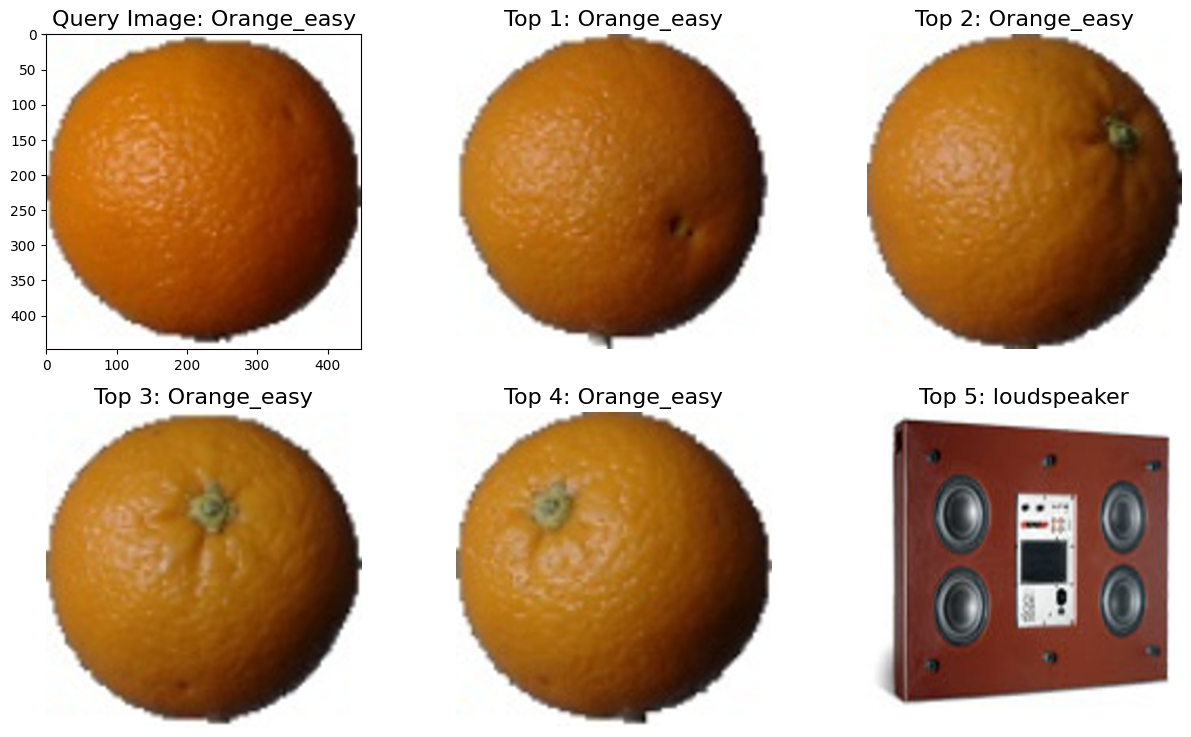

In [ ]:
# Đoạn code này thực hiện quá trình truy xuất hình ảnh bằng cách so sánh một hình ảnh truy vấn với các hình ảnh trong tập huấn luyện dựa trên điểm L1.
# Đầu tiên, các hình ảnh được thay đổi cùng kích thước.
# Tiếp theo hệ thống sẽ so sánh ảnh truy vấn với các hình ảnh trong thư mục huấn luyện để tính điểm L1.
# Sau đó, kết quả truy vấn được trả về là danh sách các đường dẫn chứa hình ảnh và điểm số tính theo L1.
# Cuối cùng 5 kết quả tốt nhất sẽ được hiển thị cùng với ảnh truy vấn

root_img_path = f'{ROOT}/train/'
query_path = f'{ROOT}/test/Orange_easy/0_100.jpg'
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

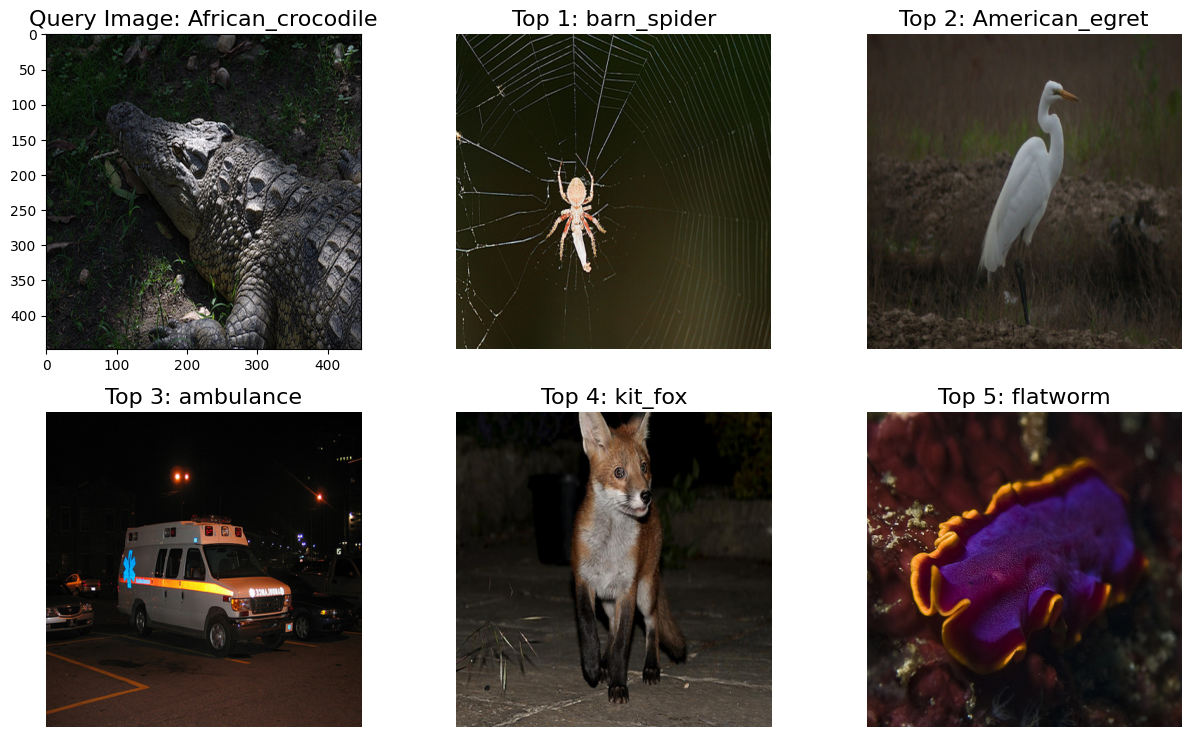

In [ ]:
root_img_path = f'{ROOT}/train/'
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

## Truy vấn hình ảnh với độ đo L2

In [ ]:
def mean_square_difference(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    return np.mean((query - data)**2, axis = axis_batch_size)

In [ ]:
def get_l2_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh,paths
            rates = mean_square_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

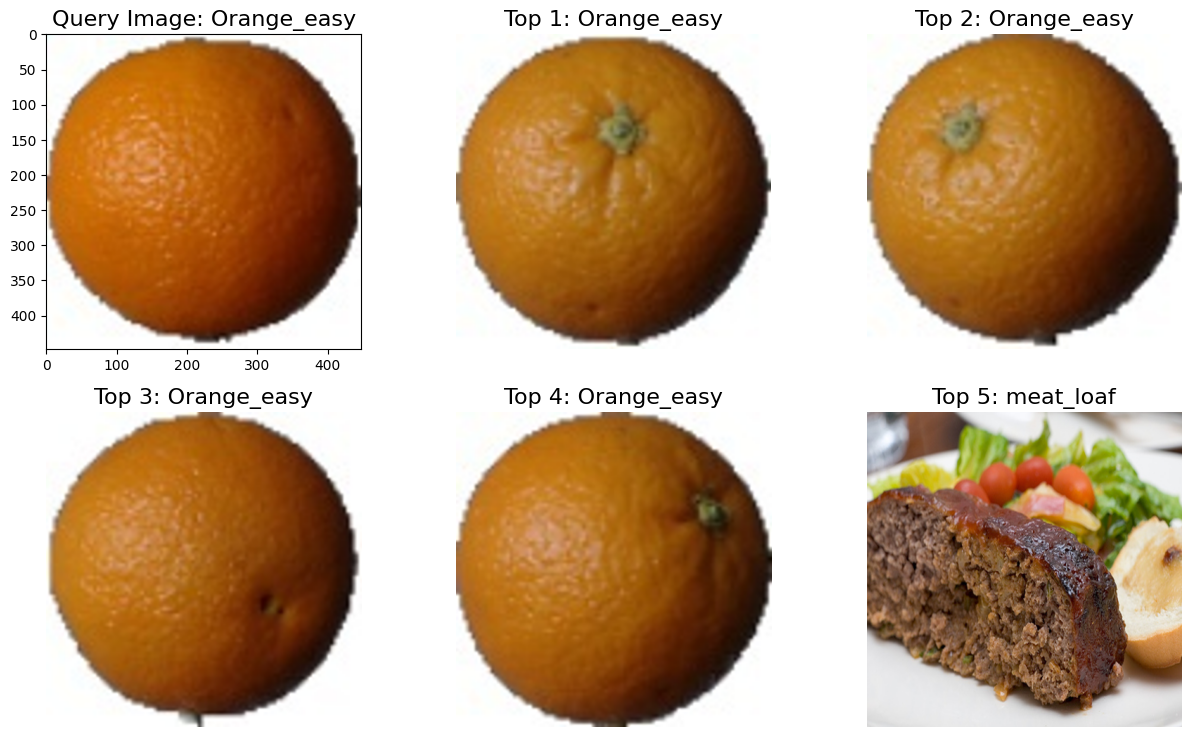

In [ ]:
root_img_path = f'{ROOT}/train/'
query_path = f'{ROOT}/test/Orange_easy/0_100.jpg'
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

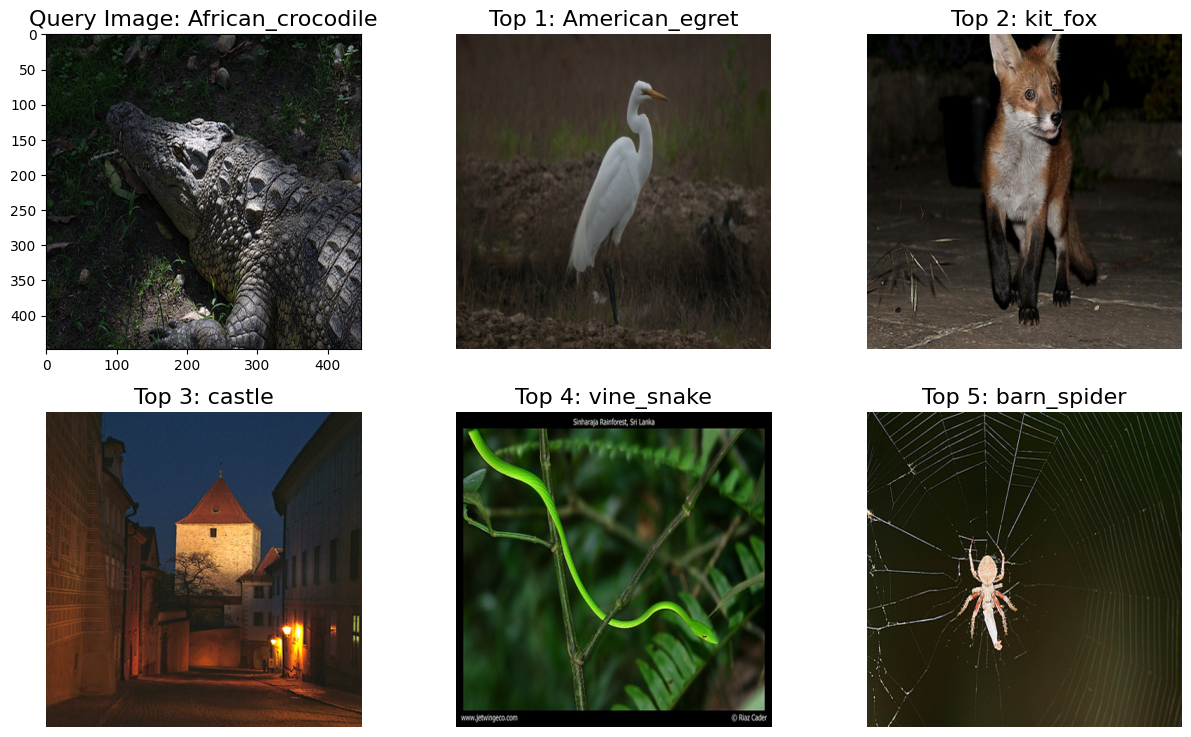

In [ ]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)


## Truy vấn hình ảnh với độ đo Cosine Similarity

In [ ]:
def cosine_similarity(query, data):
    axis_batch_size = tuple(range(1,len(data.shape)))
    # Ứng dụng norm
    query_norm = np.sqrt(np.sum(query**2))
    data_norm = np.sqrt(np.sum(data**2, axis=axis_batch_size))
    return np.sum(data * query, axis=axis_batch_size) / (query_norm*data_norm + np.finfo(float).eps)

In [ ]:
def get_cosine_similarity_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh, paths
            rates = cosine_similarity(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

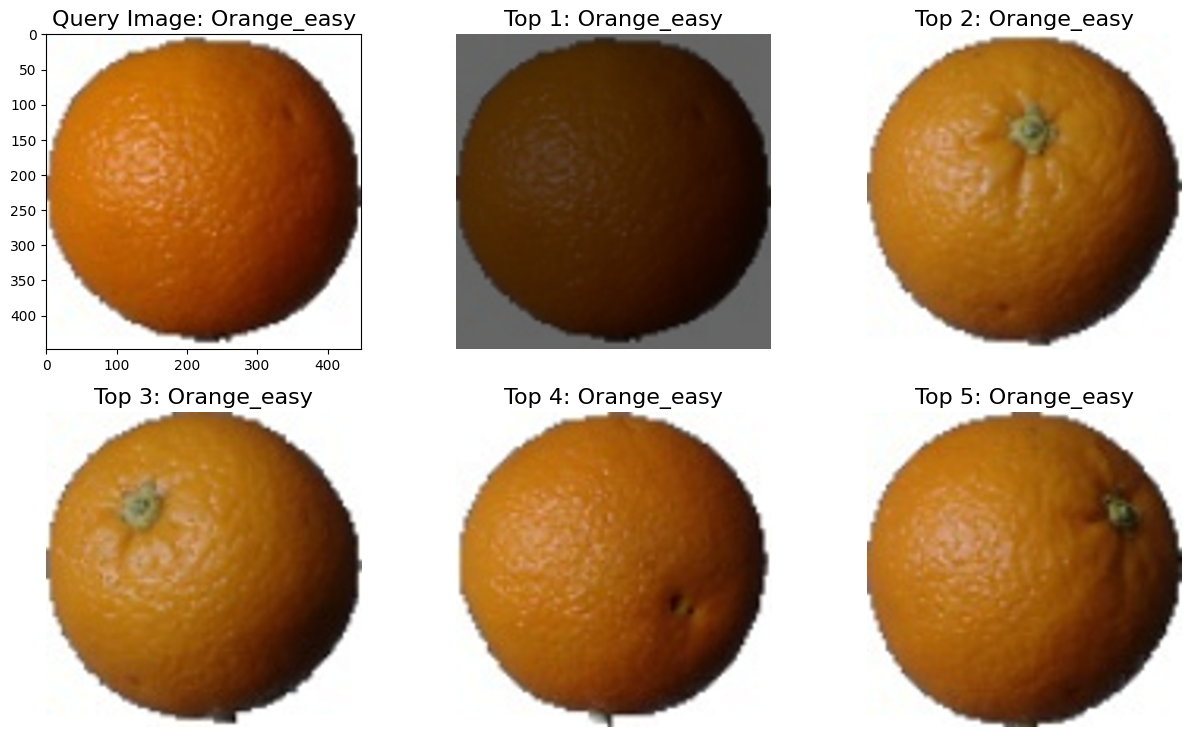

In [ ]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

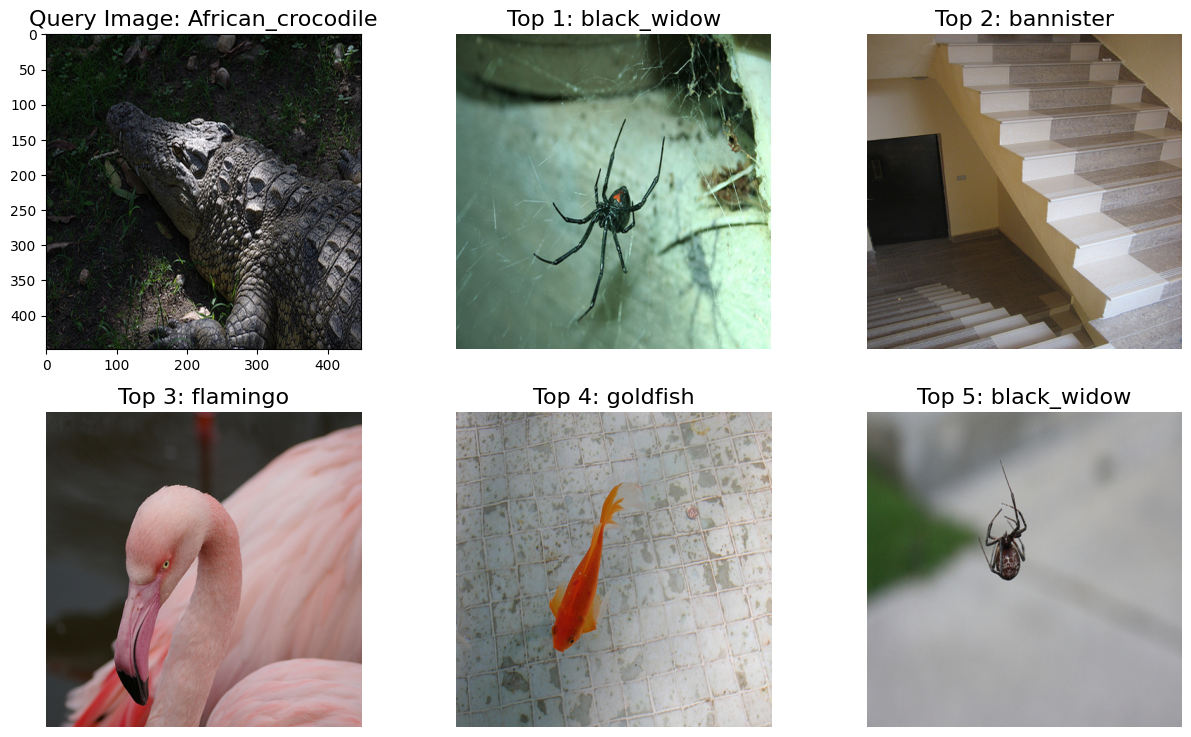

In [ ]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

## Truy vấn hình ảnh với độ đo Correlation Coefficient

In [ ]:
def correlation_coefficient(query, data):
    axis_batch_size = tuple(range(1,len(data.shape)))
    query_mean = query - np.mean(query)
    data_mean = data - np.mean(data, axis=axis_batch_size, keepdims=True)
    query_norm = np.sqrt(np.sum(query_mean**2))
    data_norm = np.sqrt(np.sum(data_mean**2, axis=axis_batch_size))

    return np.sum(data_mean * query_mean, axis=axis_batch_size) / (query_norm*data_norm + np.finfo(float).eps)

In [ ]:
def get_correlation_coefficient_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = os.path.join(root_img_path, folder) # Use os.path.join for reliable path construction
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh, paths
            rates = correlation_coefficient(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

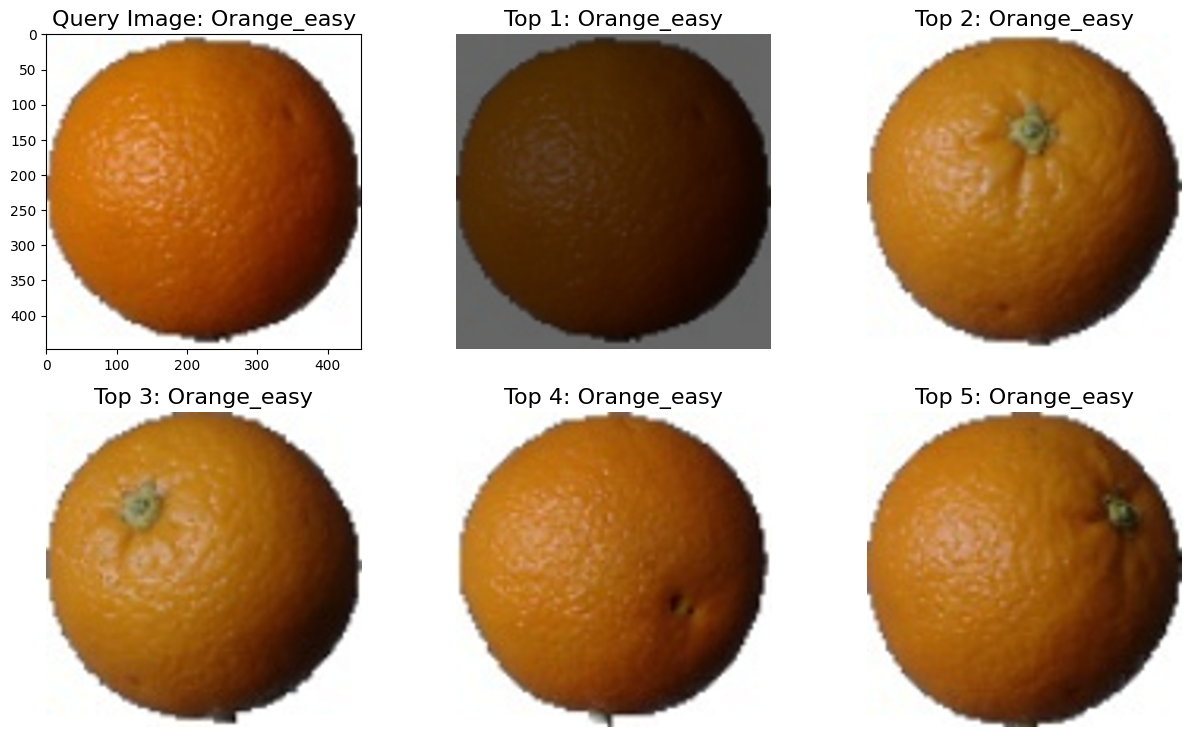

In [ ]:
root_img_path = f"{ROOT}/train"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

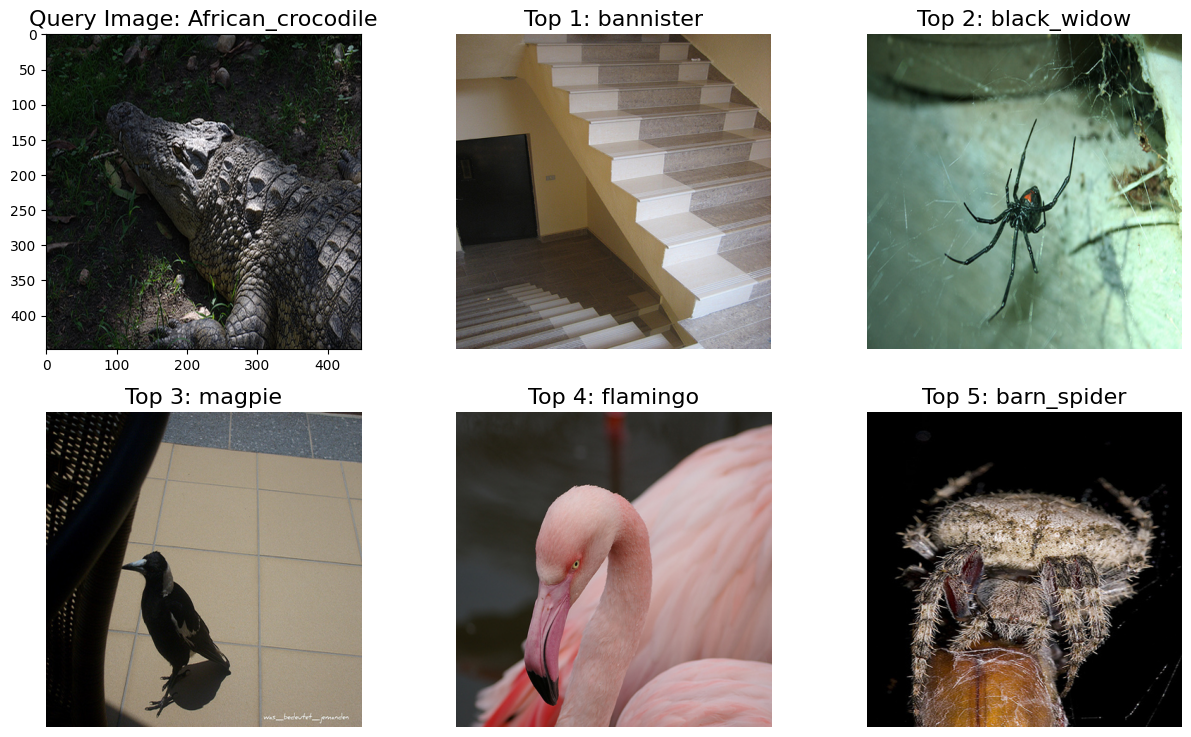

In [ ]:
root_img_path = f"{ROOT}/train"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)